# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Make a request to a web page, specified url above
# Execute GET request and store response
my_btc_data1 = requests.get(btc_url)
my_eth_data1 = requests.get(eth_url)

# Formatting as json 
data_btc = my_btc_data1.json()
data_eth = my_eth_data1.json()

# Add indents to JSON and output to screen
print(json.dumps(data_btc, indent=4))
print(json.dumps(data_eth, indent=4))


# Fetch current BTC price
current_btc_price = data_btc['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
current_eth_price = data_eth['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = current_btc_price * my_btc
my_eth_value = current_eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18526181,
            "total_supply": 18526181,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 13131.85,
                    "volume_24h": 19256882239,
                    "market_cap": 243450371165,
                    "percentage_change_1h": -0.0060028134772533,
                    "percentage_change_24h": 1.16696458945811,
                    "percentage_change_7d": 15.5381123464048,
                    "percent_change_1h": -0.0060028134772533,
                    "percent_change_24h": 1.16696458945811,
                    "percent_change_7d": 15.5381123464048
                },
                "CAD": {
                    "price": 17239.49268,
                    "volume_24h": 25280435003.3592,
                 

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [8]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-23", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for AGG and SPY
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=today,
    end=today
).df

# Preview DataFrame
df_ticker.head()

AGG                                     SPY  \
                            open    high    low   close   volume    open   
2020-10-23 00:00:00-04:00  117.3  117.52  117.3  117.47  3482671  345.93   

                                                             
                             high     low   close    volume  
2020-10-23 00:00:00-04:00  345.99  343.13  345.76  38718140

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_ticker["AGG"]["close"])
spy_close_price = float(df_ticker["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.47
Current SPY closing price: $345.76


In [10]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# # Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17288.00
The current value of your 200 AGG shares is $23494.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
crypto = my_btc_value + my_eth_value
shares = my_agg_value + my_spy_value
values1 = [crypto, shares]
df_savings = pd.DataFrame(values1, columns=["amount"], index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

amount
crypto  17942.244
shares  40782.000

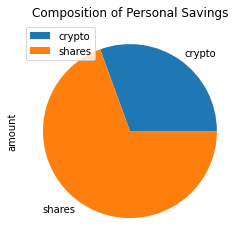

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title = "Composition of Personal Savings")

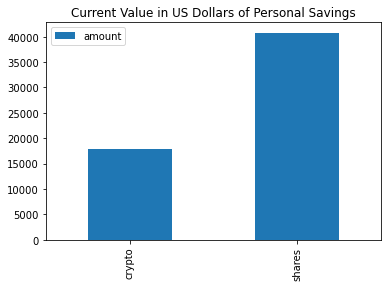

In [13]:
# Create a bar plot to show the value of shares
df_savings.plot.bar(title="Current Value in US Dollars of Personal Savings")

In [14]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(emergency_fund)

# Calculate total amount of savings
total_savings = df_savings["amount"].sum()
print(total_savings)

# Validate saving health
if total_savings > emergency_fund:
    print ("Congratulations! You have enough money in your emergency fund")
if total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal")
if total_savings < emergency_fund:
    print (f"You need to save {emergency_fund - total_savings} more to reach your financial goal")

36000
58724.244
Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date2 = pd.Timestamp('2015-10-24', tz='America/New_York').isoformat()
end_date2 = pd.Timestamp('2020-10-24', tz='America/New_York').isoformat()

In [16]:
# Set the tickers
tickers2 = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe2 = "1D"

# Get 5 years' worth of historical data for AGG and SPY
df_stock_data = api.get_barset(
    tickers2,
    timeframe2,
    start=start_date2,
    end=end_date2
).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open    high       low   close     volume   
2015-10-26 00:00:00-04:00  109.85  109.90  109.7400  109.79  1385981.0   
2015-10-27 00:00:00-04:00  110.03  110.03  109.8800  109.95  1791888.0   
2015-10-28 00:00:00-04:00  109.98  110.05  109.5700  109.63  1474796.0   
2015-10-29 00:00:00-04:00  109.34  109.42  109.1300  109.16  2095003.0   
2015-10-30 00:00:00-04:00  109.19  109.46  109.1536  109.44  3485420.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-10-26 00:00:00-04:00  207.30  207.37  206.56  206.97   51484043  
2015-10-27 00:00:00-04:00  206.20  207.00  205.79  206.58   62899344  
2015-10-28 00:00:00-04:00  206.97  208.97  206.21  208.96  115482088  
2015-10-29 00:00:00-04:00  208.34  209.27  208.21  208.87   64052955  
2015-10-30 00:00:00-04:00  209.06  209.44  207.83  207.85   91063424

In [17]:
# # Print the documentation of the MCSimulation module of the MCForecastTools library
# ?MCSimulation

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [19]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                       \
                             open    high       low   close     volume   
2015-10-26 00:00:00-04:00  109.85  109.90  109.7400  109.79  1385981.0   
2015-10-27 00:00:00-04:00  110.03  110.03  109.8800  109.95  1791888.0   
2015-10-28 00:00:00-04:00  109.98  110.05  109.5700  109.63  1474796.0   
2015-10-29 00:00:00-04:00  109.34  109.42  109.1300  109.16  2095003.0   
2015-10-30 00:00:00-04:00  109.19  109.46  109.1536  109.44  3485420.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-26 00:00:00-04:00          NaN  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.21  208.96   
2015-10-29 00:00:00-04:00    -0.004287  208.34  209.27  208.21  208.87   
2015-10-30 00:00:00-04:00     0.002565  209.06  209.44  207.83  207.85   

                                                   
                              volume daily_return  
2015-10-26 00:00:00-04:00   51484043          NaN  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521  
2015-10-29 00:00:00-04:00   64052955    -0.000431  
2015-10-30 00:00:00-04:00   91063424    -0.004883

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3          4         5          6    \
0     1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   1.000000   
1     1.004167  0.997050  1.002709  0.996983   0.993193  1.002329   1.005252   
2     1.000452  0.996810  0.999691  1.009534   0.986464  1.006532   1.017964   
3     0.997892  0.999747  0.996043  1.005318   0.982430  1.004589   1.016154   
4     1.003663  0.984158  1.001112  1.002853   0.976568  1.013042   1.022481   
...        ...       ...       ...       ...        ...       ...        ...   
7556  8.441620  6.853301  2.602303  9.047874  16.874844  8.261472  36.172832   
7557  8.466712  6.850040  2.635625  9.042224  16.801457  8.238657  36.042182   
7558  8.573654  6.868955  2.636146  9.044725  16.783942  8.167385  36.235300   
7559  8.536009  6.824189  2.612507  8.994449  16.873523  8.047141  36.312350   
7560  8.497279  6.780407  2.631264  8.937593  16.680128  8.032264  36.398563   

           7         8         9    ...       490        491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000   1.000000  1.000000   
1     0.995540  1.012094  1.014952  ...  0.983629   0.994265  0.989920   
2     0.998038  1.014136  1.010332  ...  0.989655   0.994098  1.000178   
3     0.981201  1.026294  1.022019  ...  0.992505   0.996434  0.992750   
4     0.985936  1.014707  1.027905  ...  0.987315   0.996206  0.982482   
...        ...       ...       ...  ...       ...        ...       ...   
7556  5.534238  3.298560  6.419521  ...  3.320870  11.723186  7.526081   
7557  5.564486  3.320959  6.417960  ...  3.311776  11.752710  7.531216   
7558  5.587796  3.322159  6.423481  ...  3.328290  11.857807  7.578873   
7559  5.588161  3.328859  6.421857  ...  3.341358  11.828490  7.584208   
7560  5.657513  3.354037  6.357927  ...  3.358150  11.820329  7.586285   

           493       494        495       496        497        498       499  
0     1.000000  1.000000   1.000000  1.000000   1.000000   1.000000  1.000000  
1     1.002479  1.014546   1.000290  1.003603   1.007317   1.002943  1.015749  
2     1.008556  1.015481   1.000371  1.004673   1.004828   0.996947  1.015897  
3     1.012994  1.020802   1.006121  1.006273   0.992106   0.996585  1.017904  
4     1.015627  1.014691   1.006017  1.017083   0.993603   1.003495  1.010457  
...        ...       ...        ...       ...        ...        ...       ...  
7556  5.277688  6.665225  36.841696  6.380646  23.066526  10.276468  8.706217  
7557  5.276903  6.697058  36.959992  6.327452  22.911753  10.350538  8.643083  
7558  5.289331  6.678967  36.908801  6.320347  22.529902  10.423967  8.775935  
7559  5.332516  6.644212  36.940967  6.287476  22.672980  10.488294  8.733160  
7560  5.292183  6.685210  36.839052  6.276465  22.889309  10.596812  8.740948  

[7561 rows x 500 columns]

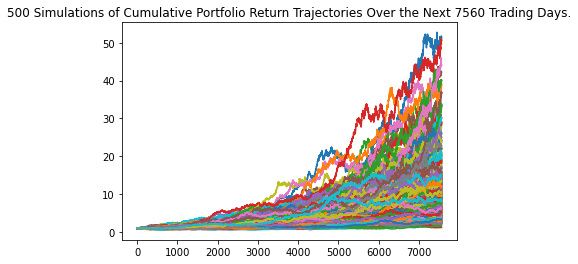

In [21]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_thirty_year_sim_plot.png", bbox_inches = "tight")

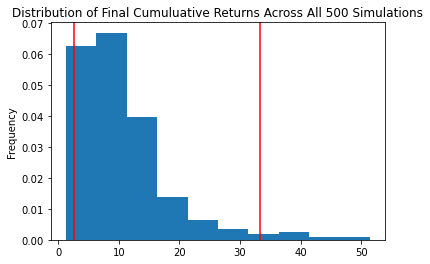

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig("MC_thirty_year_dist_plot.png", bbox_inches = "tight")

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             10.689915
std               7.687104
min               1.239300
25%               5.605807
50%               8.519783
75%              13.528742
max              51.491358
95% CI Lower      2.588990
95% CI Upper     33.331729
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8] * initial_investment, 2)
ci_upper = round(tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $51779.81 and $666634.59


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment2 = initial_investment * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower2 = round(tbl[8] * initial_investment2, 2)
ci_upper2 = round(tbl[9] * initial_investment2, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower2} and ${ci_upper2}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $77669.71 and $999951.88


## Optional Challenge - Early Retirement

---

### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252* 5
)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.995679  1.006983  1.001284  1.010596  0.999493  0.998001  0.996648   
2     0.996046  1.002910  1.005463  1.003219  0.990258  0.990306  0.999275   
3     0.987697  1.003647  0.997641  1.001299  1.005022  0.993260  0.989933   
4     0.978594  0.990967  1.001347  0.999517  1.008088  0.994792  0.992230   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.197952  2.648390  1.372971  1.258037  1.734615  2.267106  1.676243   
1257  1.190284  2.642160  1.361654  1.257945  1.739615  2.284164  1.667302   
1258  1.182302  2.636715  1.363267  1.251619  1.722381  2.280696  1.664414   
1259  1.180432  2.647236  1.365313  1.261202  1.703095  2.276817  1.665915   
1260  1.187436  2.634714  1.345548  1.267160  1.685076  2.285703  1.683494   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.999888  0.990505  0.986161  ...  0.985378  0.996636  1.001732   
2     0.994692  0.987828  0.987999  ...  0.992169  0.993318  0.998641   
3     0.988107  0.986650  0.991156  ...  0.987676  0.991655  1.000331   
4     0.978637  0.982663  0.987988  ...  0.986860  0.984914  0.999342   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.443082  1.556651  1.051717  ...  1.098169  1.310246  1.304390   
1257  1.444490  1.555554  1.042007  ...  1.084168  1.308012  1.301152   
1258  1.439762  1.539945  1.053688  ...  1.078352  1.307816  1.301445   
1259  1.452988  1.538854  1.050978  ...  1.087647  1.316324  1.302019   
1260  1.447015  1.550481  1.054467  ...  1.080829  1.322483  1.291594   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.995199  1.002944  0.998277  0.982922  0.994615  1.011856  0.999074  
2     1.010020  0.990182  1.007392  0.996362  0.992320  1.021453  1.002476  
3     1.017652  0.986573  1.007343  1.000762  0.998638  1.024219  1.011214  
4     1.019999  0.989736  1.015880  0.998976  0.987006  1.016946  1.019068  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.752691  2.445910  1.174971  1.523666  2.351897  0.871896  1.675028  
1257  1.760941  2.453293  1.190348  1.513654  2.352301  0.876902  1.664577  
1258  1.757164  2.456906  1.189541  1.502109  2.324243  0.873941  1.655954  
1259  1.752814  2.464922  1.202287  1.511863  2.300760  0.879989  1.655996  
1260  1.736251  2.472999  1.207795  1.504634  2.305912  0.888837  1.673069  

[1261 rows x 500 columns]

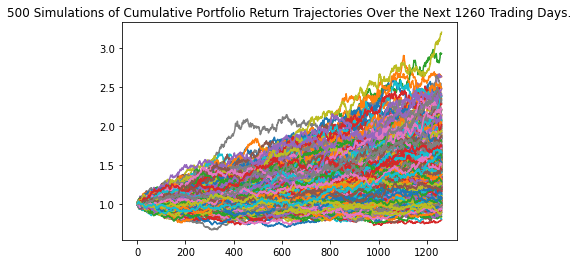

In [28]:
# Plot simulation outcomes
line_plot2 = MC_five_year.plot_simulation()

# Save the plot for future usage
line_plot2.get_figure().savefig("MC_five_year_sim_plot.png", bbox_inches = "tight")

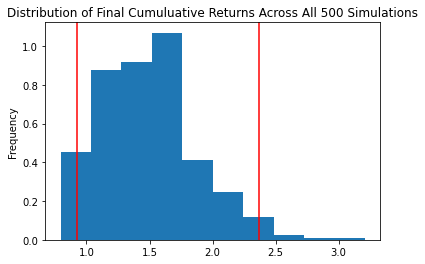

In [29]:
# Plot probability distribution and confidence intervals
dist_plot2 = MC_five_year.plot_distribution()

# Save the plot for future usage
dist_plot2.get_figure().savefig("MC_five_year_dist_plot.png", bbox_inches = "tight")

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl2 = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl2)

count           500.000000
mean              1.491092
std               0.376492
min               0.793983
25%               1.208687
50%               1.463992
75%               1.703815
max               3.207577
95% CI Lower      0.926314
95% CI Upper      2.366496
Name: 1260, dtype: float64


In [31]:
# Set initial investment
initial_investment3 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes
# of our $60,000
ci_lower_five = round(tbl2[8] * initial_investment3, 2)
ci_upper_five = round(tbl2[9] * initial_investment3, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment3} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $55578.83 and $141989.79


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252* 10
)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.993290  0.999337  1.002123  0.997791  0.995097  1.005672  1.004895   
2     1.007887  1.000881  0.998642  1.005513  0.996860  1.002010  0.999441   
3     0.994917  1.005004  0.997252  1.014243  0.982507  1.002381  0.986610   
4     0.995102  1.006772  0.984983  1.018110  0.993163  0.994041  0.974830   
...        ...       ...       ...       ...       ...       ...       ...   
2516  3.683694  2.073766  4.767525  1.838835  3.233334  2.906670  2.825837   
2517  3.690779  2.073510  4.738248  1.815775  3.253639  2.897113  2.823152   
2518  3.690555  2.081925  4.722369  1.833126  3.282244  2.906749  2.809661   
2519  3.677771  2.087646  4.669420  1.827840  3.267145  2.903729  2.821641   
2520  3.658912  2.105304  4.707529  1.800697  3.286551  2.900602  2.830619   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.999605  0.999095  1.000176  ...  0.996886  0.999891  1.001582   
2     0.993308  1.001277  1.004298  ...  1.016458  1.000586  0.995682   
3     0.993548  1.000053  1.005687  ...  1.035368  1.003468  0.996593   
4     1.000905  1.003831  1.009881  ...  1.034646  0.993508  1.006021   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.952323  2.734019  1.478910  ...  1.504507  2.228090  2.052030   
2517  1.950314  2.767623  1.482825  ...  1.511744  2.232597  2.048881   
2518  1.951974  2.777171  1.478891  ...  1.509807  2.229398  2.050401   
2519  1.969854  2.772492  1.488000  ...  1.527750  2.228245  2.060726   
2520  1.975399  2.760750  1.481546  ...  1.530922  2.237300  2.074911   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.000967  0.996104  0.992432  0.988438  1.002741  0.992357  0.998636  
2     0.997686  1.005504  0.990770  0.983288  0.994187  0.999525  1.003002  
3     0.999402  1.004793  0.994637  0.987416  1.003056  1.001776  1.002768  
4     0.992681  0.997524  0.989698  0.993666  1.012585  0.999601  1.012584  
...        ...       ...       ...       ...       ...       ...       ...  
2516  4.027561  2.085942  1.125268  1.347467  1.393885  1.146085  3.672413  
2517  4.073631  2.076294  1.126557  1.334936  1.398314  1.152032  3.668507  
2518  4.124936  2.103514  1.126203  1.350615  1.405313  1.164399  3.689374  
2519  4.127446  2.123620  1.116220  1.365790  1.408702  1.162823  3.660710  
2520  4.095019  2.111204  1.128884  1.364573  1.434443  1.161581  3.677149  

[2521 rows x 500 columns]

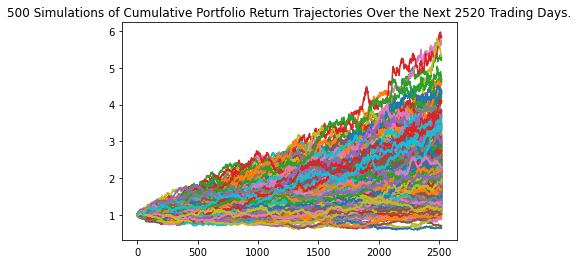

In [34]:
# Plot simulation outcomes
line_plot3 = MC_ten_year.plot_simulation()

# Save the plot for future usage
line_plot3.get_figure().savefig("MC_ten_year_sim_plot.png", bbox_inches = "tight")

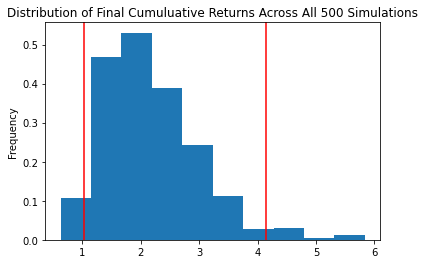

In [35]:
# Plot probability distribution and confidence intervals
dist_plot3 = MC_ten_year.plot_distribution()

# Save the plot for future usage
dist_plot3.get_figure().savefig("MC_ten_year_dist_plot.png", bbox_inches = "tight")

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl3 = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
print(tbl3)

count           500.000000
mean              2.173713
std               0.800437
min               0.631850
25%               1.598978
50%               2.023824
75%               2.595172
max               5.836004
95% CI Lower      1.032744
95% CI Upper      4.152353
Name: 2520, dtype: float64


In [37]:
# Set initial investment
initial_investment3 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes
# of our $60,000
ci_lower_ten = round(tbl3[8] * initial_investment3, 2)
ci_upper_ten = round(tbl3[9] * initial_investment3, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment3} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $61964.63 and $249141.16


### My Bonus - defining function to display all of the metrics at once

In [40]:
import matplotlib.pyplot as plt

def calculate_mcsimulation(investment, number_of_years):
    # Configuring a Monte Carlo simulation to forecast "number_of_years" years cumulative returns
    MC_year = MCSimulation(
        portfolio_data = df_stock_data,
        weights = [.40,.60],
        num_simulation = 500,
        num_trading_days = 252* number_of_years
    )
    MC_year.calc_cumulative_return()
    
    # Plot simulation outcomes
    line_plot4 = MC_year.plot_simulation()
    # Save the plot for future usage
    line_plot4.get_figure().savefig(f"MC_{number_of_years}_year_sim_plot.png", bbox_inches = "tight")
    plt.show()
    
    # Plot probability distributions and confidence intervals
    dist_plot4 = MC_year.plot_distribution()
    # Save the plot for future usage
    dist_plot4.get_figure().savefig(f"MC_{number_of_years}_year_dist_plot.png", bbox_inches = "tight")
    plt.show()
    
    # Fetch summary statistics from the Monte Carlo simulation results
    tbl4 = MC_year.summarize_cumulative_return()
    # Print summary statistics
    print(tbl4)

    # Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes
    # of our "investment"
    ci_lower_year = round(tbl4[8] * investment, 2)
    ci_upper_year = round(tbl4[9] * investment, 2)

    # Print results
    print(f"There is a 95% chance that an initial investment of ${investment} in the portfolio"
          f" over the next {number_of_years} years will end within in the range of"
          f" ${ci_lower_year} and ${ci_upper_year}")

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

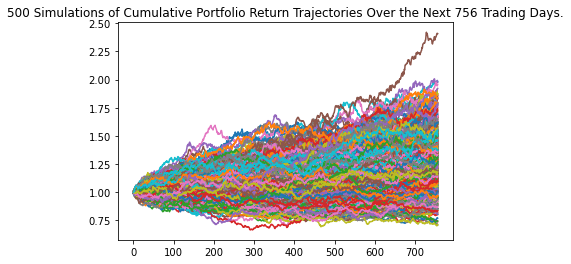

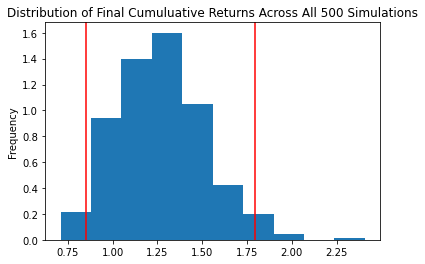

count           500.000000
mean              1.271260
std               0.245663
min               0.708462
25%               1.094474
50%               1.253080
75%               1.420585
max               2.408261
95% CI Lower      0.851017
95% CI Upper      1.796286
Name: 756, dtype: float64
There is a 95% chance that an initial investment of $50000 in the portfolio over the next 3 years will end within in the range of $42550.87 and $89814.3


In [41]:
# Call the function and send arguments for investment and number_of_years parameters, respectively.
calculate_mcsimulation(50000, 3)